In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import CubicSpline
from scipy.special import jn
from sympy import symbols, diff, lambdify, sqrt
%config InlineBackend.figure_format = 'svg'

In [15]:
def solve_tridiag(a, b, c, rhs):
    """
    Solves tridiagonal system of linear equations using the Thomas algorithm.
    
    Parameters:
    a -- first subdiagonal elements (size n-1)
    b -- diagonal elements (size n)
    c -- first superdiagonal elements (size n-1)
    rhs -- right-hand side of the equation (size n)
    
    Returns:
    x -- solution of the system (size n)
    """
    n = b.shape[0]
    x = np.zeros(n)
    
    # Forward elimination
    c[0] = c[0] / b[0]
    rhs[0] = rhs[0] / b[0]
    
    for i in range(1, n-1):
        denominator = b[i] - a[i-1] * c[i-1]
        c[i] = c[i] / denominator
        rhs[i] = (rhs[i] - a[i-1] * rhs[i-1]) / denominator
    rhs[n-1] = (rhs[n-1] - a[n-2] * rhs[n-2]) / (b[n-1] - a[n-2] * c[n-2])

    # Back substitution
    x[n-1] = rhs[n-1]
    for i in range(n-2, -1, -1):
        x[i] = rhs[i] - c[i] * x[i+1]
    
    return x

## Plotting the function

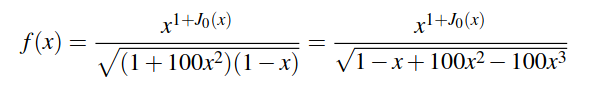

In [16]:
# Defining the function
def f(x):
    num=pow(x,1+jn(0,x))
    densqr=(1+100*x*x)*(1-x)
    den=np.sqrt(densqr)
    return num/den

# Creating a table of values in range (0,0.9) with spacing 0.05
x=np.arange(0.1,0.905,0.05)
y=f(x)

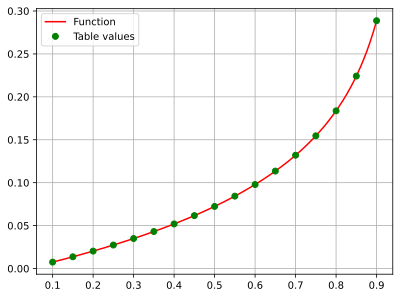

In [17]:
# Plotting the function
xx = np.linspace(0.1,0.9,1000)
yy = f(xx)

plt.plot(xx,yy,'r', x,y, 'go')
plt.grid()
plt.legend(["Function","Table values"])
plt.show()

## Natural Cubic Spline

In [18]:
# Cubic interpolation with y'' = 0.0 at the boundaries
natspline = CubicSpline(x, y, bc_type='natural')
ff = natspline(xx) # Interpolated value
err = np.abs(ff-f(xx)) # Errors

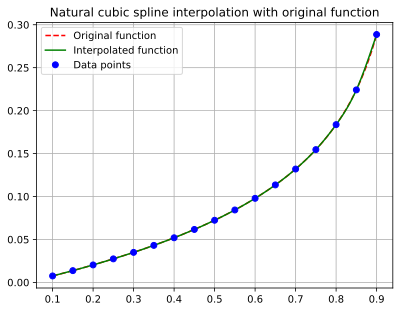

In [19]:
plt.plot(xx,f(xx),'r--', xx,ff,'g',x,y,'bo')
plt.legend(['Original function','Interpolated function', 'Data points'])
plt.title("Natural cubic spline interpolation with original function")
plt.grid()
plt.show()

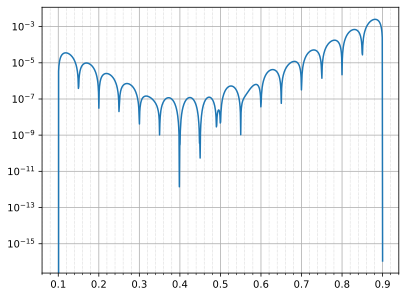

In [20]:
plt.semilogy(xx, err, label='Error')
plt.grid()
plt.grid(which='minor', linestyle=":", linewidth=0.5)
plt.minorticks_on()
plt.show()

In [21]:
max_errors1 = []
num_points = range(20,1000,10)
for n in num_points:
    x = np.linspace(0,0.9,n)
    y = f(x)
    natspline = CubicSpline(x,y,bc_type='natural')
    ff = natspline(xx)
    max_errors1.append(max(np.abs(ff-f(xx))))

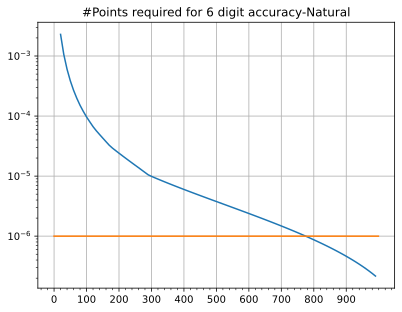

In [22]:
hl = [1e-6]*1000

plt.semilogy(num_points,max_errors1)
plt.plot(hl)
plt.title('#Points required for 6 digit accuracy-Natural')
plt.xticks(range(0,1000,100))
plt.minorticks_on()
plt.grid()
plt.show()

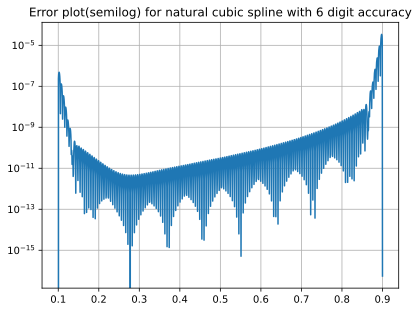

In [38]:
# Error profile for numn points which gives 6 digit accuracy

x = np.linspace(0.1,0.9,150, endpoint=True)
y = f(x)

xx = np.linspace(0.1,0.9,1500, endpoint=True)
yy = f(xx)

natspline = CubicSpline(x, y, bc_type='natural')
ff = natspline(xx) # Interpolated value
err = np.abs(ff-f(xx)) # Errors

plt.semilogy(xx, err)
plt.grid()
plt.title("Error plot(semilog) for natural cubic spline with 6 digit accuracy")
plt.show()

In [24]:
h = x[1]-x[0]
n = len(x)
b = 2*np.ones(n)
rhs = np.zeros(n)
a, c = np.zeros(n-1), np.zeros(n-1)
for i in range(n-2):
    a[i] = 0.5
for i in range(1,n-1):
    c[i] = 0.5
for i in range(1,n-1):
    rhs[i] = (6/(2*h))*((y[i+1]-y[i])/h - (y[i]-y[i-1])/h)

In [25]:
M = solve_tridiag(a,b,c,rhs)

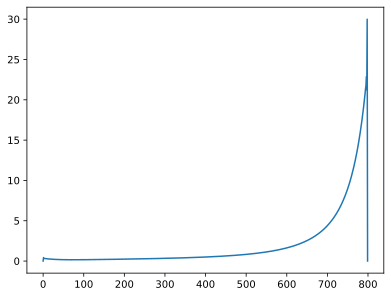

In [26]:
plt.plot(M);

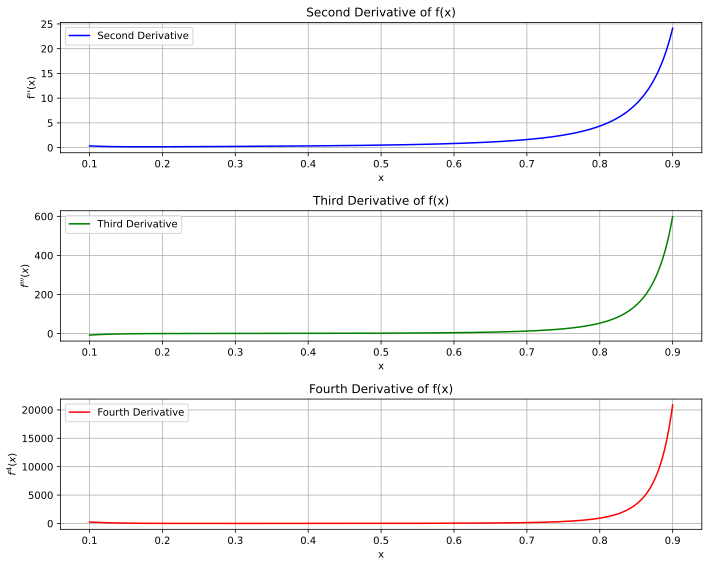

In [27]:
# Define the variable and function using SymPy
x = symbols('x')
f_expr = (x**(1 + sp.besselj(0, x))) / (sqrt((1 + 100*x**2)*(1 - x)))

# Compute the second and fourth derivatives
f_prime2 = diff(f_expr, x, 2)
f_prime3 = diff(f_expr, x, 3)
f_prime4 = diff(f_expr, x, 4)

# Convert the sympy expressions to numerical functions, mapping besselj to scipy.special.jn
f_prime2_func = lambdify(x, f_prime2, modules=[{'besselj': jn}, 'numpy'])
f_prime3_func = lambdify(x, f_prime3, modules=[{'besselj': jn}, 'numpy'])
f_prime4_func = lambdify(x, f_prime4, modules=[{'besselj': jn}, 'numpy'])

# Generate x values in the region [0.1, 0.9]
x_vals = np.linspace(0.1, 0.9, 500)

# Compute the second and fourth derivatives for the x values
f_prime2_vals = f_prime2_func(x_vals)
f_prime3_vals = f_prime3_func(x_vals)
f_prime4_vals = f_prime4_func(x_vals)

# Plot the second and fourth derivatives
plt.figure(figsize=(10, 8))

# Plot the second derivative
plt.subplot(3, 1, 1)
plt.plot(x_vals, f_prime2_vals, label="Second Derivative", color="blue")
plt.title("Second Derivative of f(x)")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.grid(True)
plt.legend()

# Plot the third derivative
plt.subplot(3, 1, 2)
plt.plot(x_vals, f_prime3_vals, label="Third Derivative", color="green")
plt.title("Third Derivative of f(x)")
plt.xlabel("x")
plt.ylabel("$f'''(x)$")
plt.grid(True)
plt.legend()

# Plot the fourth derivative
plt.subplot(3, 1, 3)
plt.plot(x_vals, f_prime4_vals, label="Fourth Derivative", color="red")
plt.title("Fourth Derivative of f(x)")
plt.xlabel("x")
plt.ylabel("$f^4(x)$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Not-a-knot Spline

In [28]:
x = np.arange(0.1,0.905,0.05)
y = f(x)

In [29]:
nknotspline = CubicSpline(x, y, bc_type='not-a-knot')
xx = np.linspace(0.1,0.9,1000)
ff = nknotspline(xx)
err = np.abs(ff-f(xx))

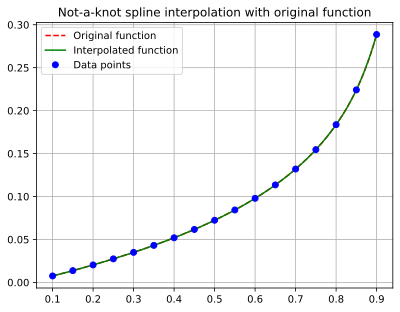

In [30]:
plt.plot(xx,f(xx),'r--', xx,ff,'g',x,y,'bo')
plt.legend(['Original function','Interpolated function', 'Data points'])
plt.grid()
plt.title('Not-a-knot spline interpolation with original function')
plt.show()

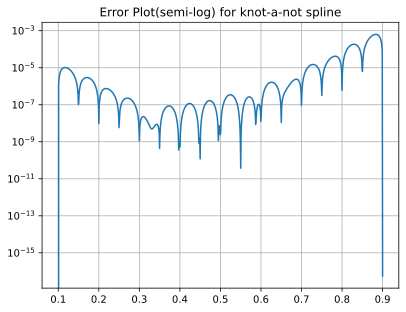

In [31]:
plt.semilogy(xx, err)
plt.grid()
plt.title('Error Plot(semi-log) for knot-a-not spline')
plt.show()

In [32]:
max_errors2 = []
num_points = range(20,1000,10)
for n in num_points:
    x = np.linspace(0,0.9,n)
    y = f(x)
    nknotspline = CubicSpline(x,y,bc_type='not-a-knot')
    ff = nknotspline(xx)
    max_errors2.append(max(np.abs(ff-f(xx))))

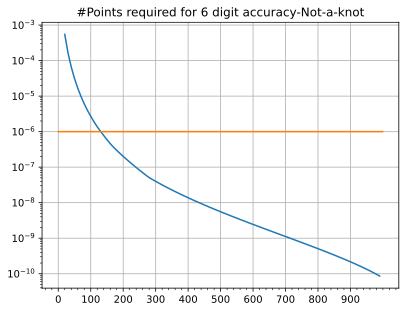

In [33]:
hl = [1e-6]*1000

plt.semilogy(num_points,max_errors2)
plt.plot(hl)
plt.title('#Points required for 6 digit accuracy-Not-a-knot')
plt.xticks(range(0,1000,100))
plt.minorticks_on()
plt.grid()
plt.show()

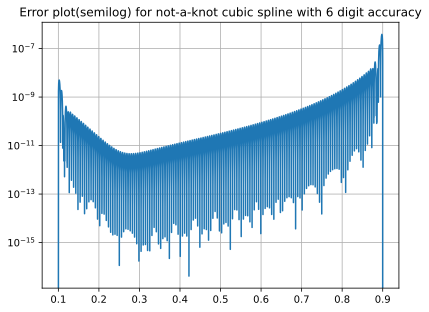

In [40]:
# Error profile for numn points which gives 6 digit accuracy

x = np.linspace(0.1,0.9,150)
y = f(x)

xx = np.linspace(0.1,0.9,10000)
yy = f(xx)

spline = CubicSpline(x, y, bc_type='not-a-knot')
ff = spline(xx) # Interpolated value
err = np.abs(ff-f(xx)) # Errors

plt.semilogy(xx, err)
plt.grid()
plt.title("Error plot(semilog) for not-a-knot cubic spline with 6 digit accuracy")
plt.show()

## Using the information of derivatives

In [35]:
def alpha(x):
    return 1 + jn(0, x)

def beta(x):
    return np.sqrt(1 - x + 100*x**2 - 100*x**3)

def alpha_p(x):
    return -jn(1, x)

def beta_p(x):
    return (-1 + 200*x - 300*x**2) / (2 * beta(x))

# def f_p(x):
#     term1 = x**alpha(x) * (alpha_p(x) * np.log(x) + alpha(x) / x)
#     term2 = beta_p(x) / (beta(x)**2)
#     return (term1 / beta(x)) - (x**alpha(x) * term2)

from scipy.special import jv

def func(x):
    return pow(x, 1+jv(0, x))/np.sqrt((1+100*x*x)*(1-x))

def f_p(x):
    return (-jv(1, x)*np.log(x) + (1+jv(0, x))/x + (300*x*x - 200*x +1)/(2*(1+100*x*x)*(1-x)))*func(x)

In [23]:
f_p(0.1), f_p(0.9)

(np.float64(0.11728789794456164), np.float64(1.7185523826723892))

In [24]:
x = np.arange(0.1,0.905,0.05)
y = f(x)

In [25]:
spline = CubicSpline(x, y, bc_type=((1,f_p(0.1)),(1,f_p(0.9))))

In [26]:
xx = np.linspace(0.1,0.9,1000)
ff = spline(xx)
err = np.abs(ff-f(xx))

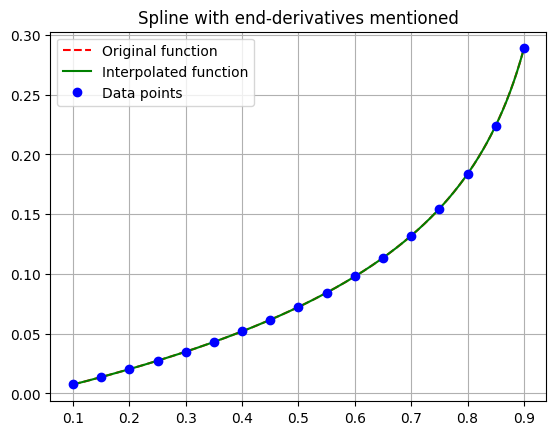

In [27]:
plt.plot(xx,f(xx),'r--', xx,ff,'g',x,y,'bo')
plt.legend(['Original function','Interpolated function', 'Data points'])
plt.grid()
plt.title('Spline with end-derivatives mentioned')
plt.show()

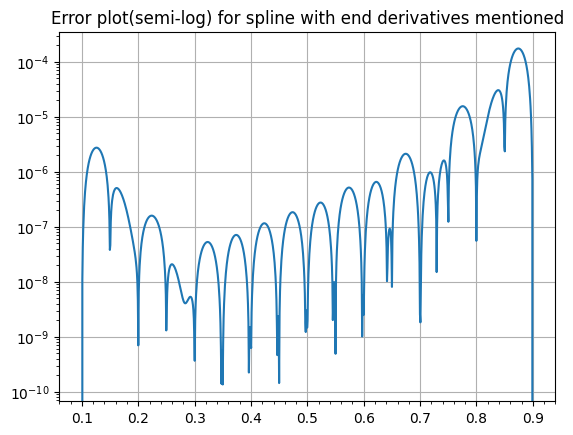

In [28]:
plt.semilogy(xx, err)
plt.grid()
plt.title('Error plot(semi-log) for spline with end derivatives mentioned')
plt.minorticks_on()
plt.show()

In [29]:
max_errors3 = []
num_points = range(20,1000,10)
for n in num_points:
    x = np.linspace(0,0.9,n)
    y = f(x)
    derspline = CubicSpline(x,y,bc_type=((1,f_p(0.1)),(1,f_p(0.9))))
    ff = derspline(xx)
    max_errors3.append(max(np.abs(ff-f(xx))))

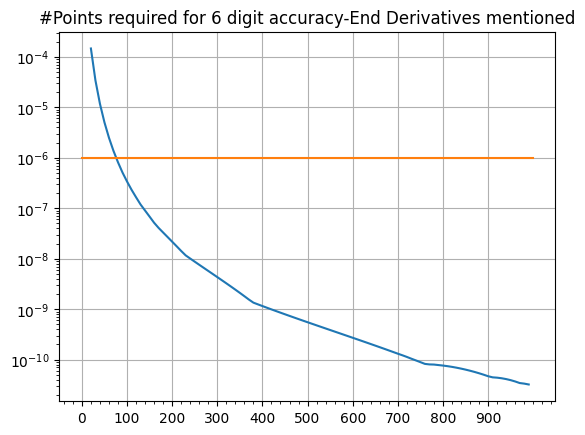

In [30]:
hl = [1e-6]*1000

plt.semilogy(num_points,max_errors3)
plt.plot(hl)
plt.title('#Points required for 6 digit accuracy-End Derivatives mentioned')
plt.xticks(range(0,1000,100))
plt.minorticks_on()
plt.grid()
plt.show()

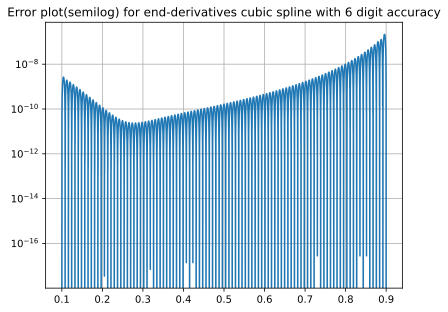

In [41]:
# Error profile for num points which gives 6 digit accuracy

x = np.linspace(0.1,0.9,100)
y = f(x)

xx = np.linspace(0.1,0.9,10000)
yy = f(xx)

spline = CubicSpline(x,y,bc_type=((1,f_p(0.1)),(1,f_p(0.9))))
ff = spline(xx) # Interpolated value
err = np.abs(ff-f(xx)) # Errors

plt.semilogy(xx, err)
plt.grid()
plt.title("Error plot(semilog) for end-derivatives cubic spline with 6 digit accuracy")
plt.show()

In [32]:
h = x[1]-x[0]
n = len(x)
b = 2*np.ones(n)
rhs = np.zeros(n)
a, c = np.zeros(n-1), np.zeros(n-1)
for i in range(n-2):
    a[i] = 0.5
for i in range(1,n-1):
    c[i] = 0.5
for i in range(1,n-1):
    rhs[i] = (6/(2*h))*((y[i+1]-y[i])/h - (y[i]-y[i-1])/h)

a[n-2] = 1
c[0] = 1

rhs[0] = (6/h)*((y[1]-y[0])/h - f_p(0.1))
rhs[-1] = (6/h)*(f_p(0.9) - (y[n-1]-y[n-2])/h)

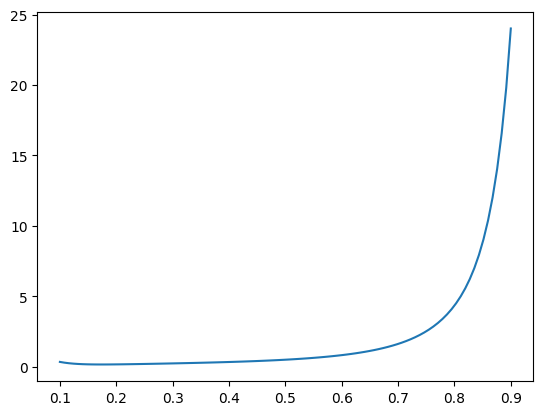

In [33]:
M = solve_tridiag(a,b,c,rhs)
plt.plot(x, M);

## Using 100 times the derivative

In [42]:
x = np.arange(0.1,0.905,0.05)
xx = np.linspace(0.1,0.9,1000)
y = f(x)

In [43]:
spline = CubicSpline(x, y, bc_type=((1,100*f_p(0.1)),(1,100*f_p(0.9))))

In [44]:
ff = spline(xx)
err = np.abs(ff-f(xx))

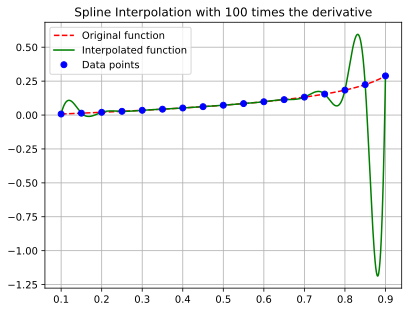

In [45]:
plt.plot(xx,f(xx),'r--', xx,ff,'g',x,y,'bo')
plt.legend(['Original function','Interpolated function', 'Data points'])
plt.grid()
plt.title('Spline Interpolation with 100 times the derivative')
plt.show()

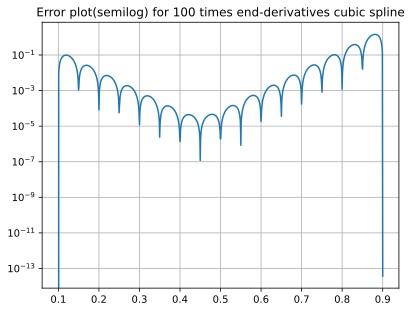

In [46]:
plt.semilogy(xx, err)
plt.grid()
plt.title("Error plot(semilog) for 100 times end-derivatives cubic spline")
plt.show()

0.9


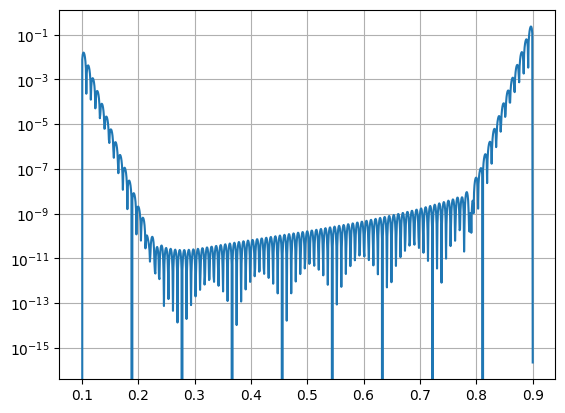

In [46]:
x = np.linspace(0.1,0.9,100)
y = f(x)
spline = CubicSpline(x, y, bc_type=((1,100*f_p(0.1)),(1,100*f_p(0.9))))
ff = spline(xx)
err = np.abs(ff-f(xx))
plt.semilogy(xx, err)
plt.grid()
plt.show()

In [40]:
h = x[1]-x[0]
n = len(x)
b = 2*np.ones(n)
rhs = np.zeros(n)
a, c = np.zeros(n-1), np.zeros(n-1)
for i in range(n-2):
    a[i] = 0.5
for i in range(1,n-1):
    c[i] = 0.5
for i in range(1,n-1):
    rhs[i] = (6/(2*h))*((y[i+1]-y[i])/h - (y[i]-y[i-1])/h)

a[n-2] = 1
c[0] = 1

rhs[0] = (6/h)*((y[1]-y[0])/h - 100*f_p(0.1))
rhs[-1] = (6/h)*(100*f_p(0.9) - (y[n-1]-y[n-2])/h)

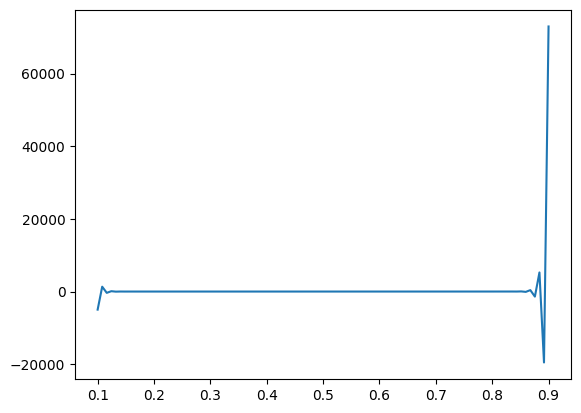

In [41]:
M = solve_tridiag(a,b,c,rhs)
plt.plot(x, M);

## Using non-uniformly spaced points

Assuming the error is similar to cubic interpolation, one way to get uniform error across the domain is to use chebyshev points

In [42]:
def chebyshev_pts(n, a, b):
    theta = np.linspace(0, np.pi, n, endpoint=True)
    x = np.cos(theta)[::-1]
    x = (b-a)*0.5*x + (b+a)*0.5
    return x

In [43]:
x = chebyshev_pts(16,0.1,0.9)
y = f(x)

In [44]:
spline = CubicSpline(x, y, bc_type='not-a-knot')
ff = spline(xx)
err = np.abs(ff-f(xx))

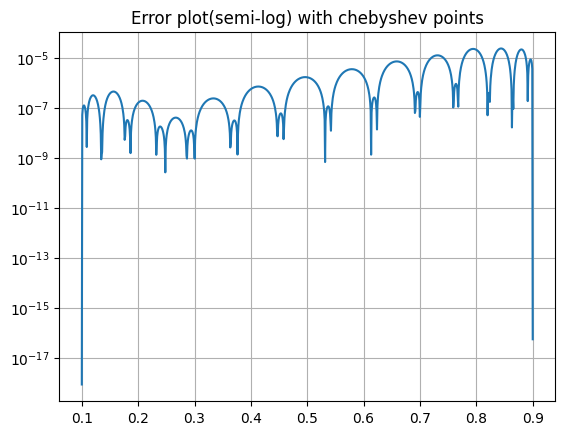

In [45]:
plt.semilogy(xx, err)
plt.grid()
plt.title('Error plot(semi-log) with chebyshev points')
plt.show()